### JR Sanders
### June-8-2023
### EdTech Industry Analysis
#### Target variable <b> status <b>

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import xgboost as xgb
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
   AdaBoostRegressor,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
eddf1 = pd.read_csv("ExtraaLearn.csv")

In [3]:
edu = eddf1.copy()

In [4]:
edu.shape

(4612, 15)

### Checking For Duplicates

In [5]:
edu.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4607    False
4608    False
4609    False
4610    False
4611    False
Length: 4612, dtype: bool>

In [6]:
type(edu)

pandas.core.frame.DataFrame

### Check for Missing Data

In [7]:
### Let's Check For Missing Values
edu.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [8]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [9]:
edu.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [10]:
edu.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

## Building Categorical and Non-Categorical Dframes

In [11]:
# Dropped The ID Column
edu=edu.drop(['ID'],axis=1)

In [12]:
# Assuming you have a dataframe called 'df'. Get a list of numerical columns 
numerical_columns = edu.select_dtypes(include=['float64', 'int64']).columns.tolist() 
# Get a list of categorical columns 
categorical_columns = edu.select_dtypes(include=['object']).columns.tolist() 
# Get a list of non-object columns (numerical + other non-object types) 
# non_object_columns = edu.select_dtypes(exclude=['object']).columns.tolist() 

#### Numerical Features

<AxesSubplot:>

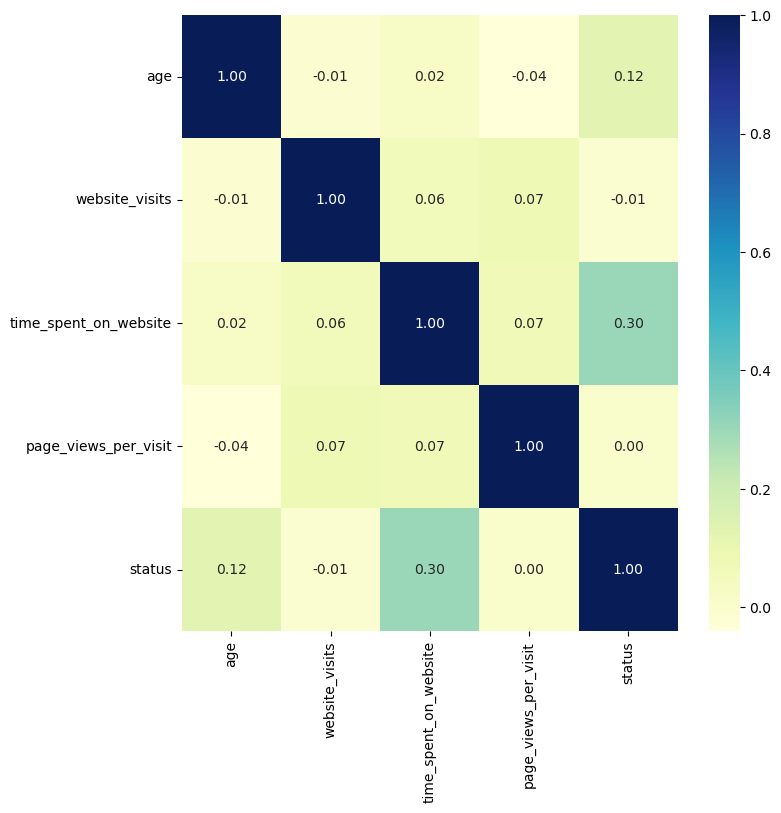

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(edu[numerical_columns].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [14]:
edu.groupby(['status'])[numerical_columns].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
status,,,,,
0,45.153,3.579,577.421,3.026,0.000
1,48.664,3.538,1068.398,3.027,1.000


In [15]:
edu[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.000,46.201,13.161,18.000,36.000,51.000,57.000,63.000
website_visits,4612.000,3.567,2.829,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4612.000,724.011,743.829,0.000,148.750,376.000,1336.750,2537.000
page_views_per_visit,4612.000,3.026,1.968,0.000,2.078,2.792,3.756,18.434
status,4612.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'website_visits'}>],
       [<AxesSubplot:title={'center':'time_spent_on_website'}>,
        <AxesSubplot:title={'center':'page_views_per_visit'}>],
       [<AxesSubplot:title={'center':'status'}>, <AxesSubplot:>]],
      dtype=object)

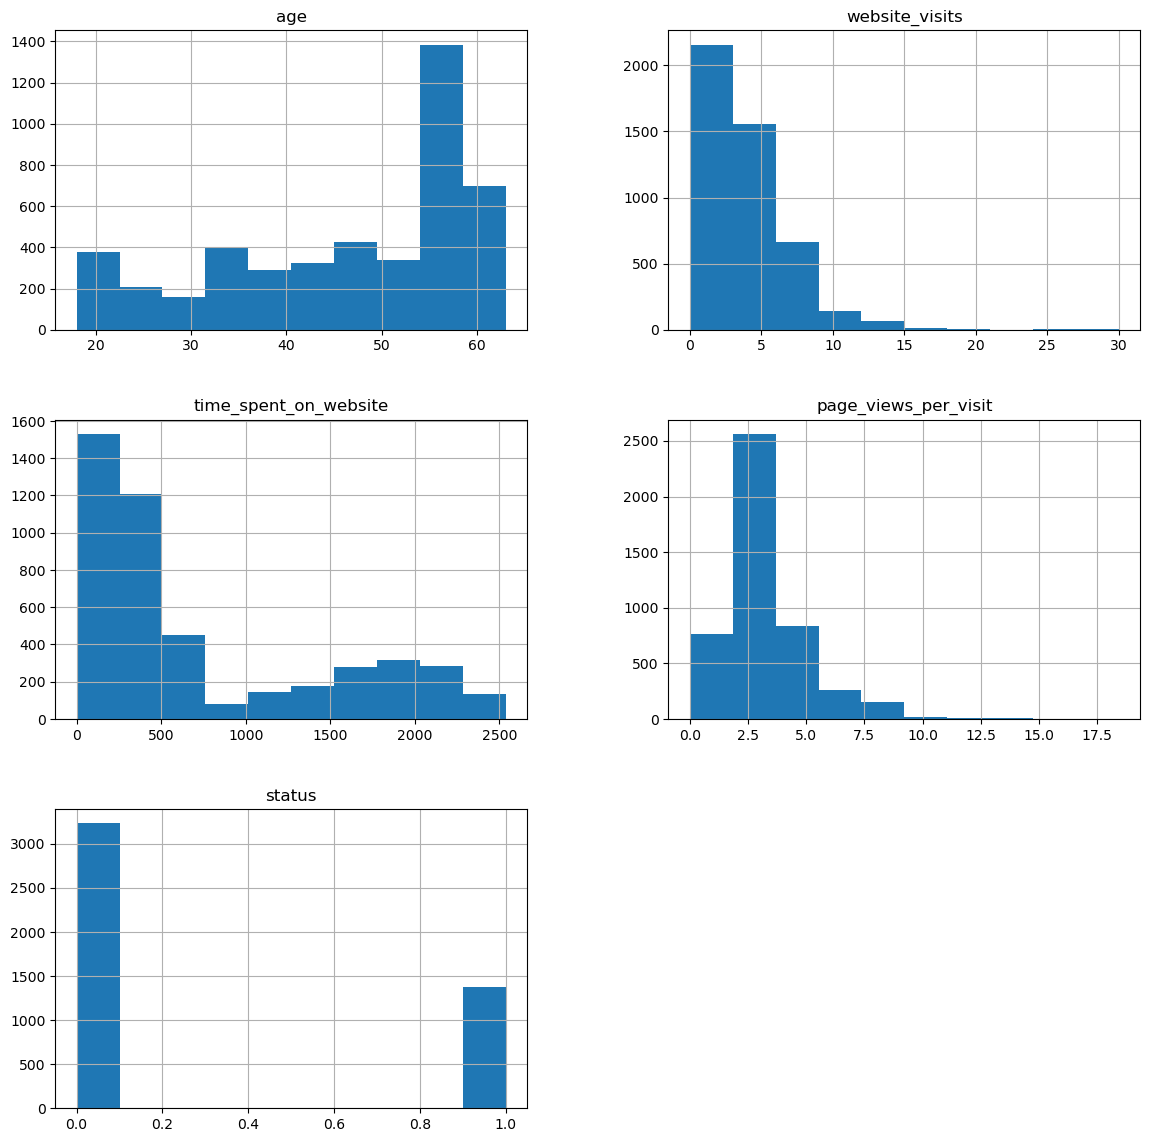

In [16]:
edu[numerical_columns].hist(figsize=(14,14))

#### Categorical Features

In [17]:
edu[categorical_columns]

,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
0,Unemployed,Website,High,Website Activity,Yes,No,Yes,No,No
1,Professional,Mobile App,Medium,Website Activity,No,No,No,Yes,No
2,Professional,Website,Medium,Website Activity,No,No,Yes,No,No
3,Unemployed,Website,High,Website Activity,No,No,No,No,No
4,Student,Website,High,Email Activity,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
4607,Unemployed,Mobile App,Medium,Phone Activity,No,No,No,Yes,No
4608,Professional,Mobile App,Medium,Email Activity,No,No,No,No,No
4609,Professional,Website,High,Email Activity,No,No,No,No,No
4610,Professional,Mobile App,Medium,Website Activity,Yes,No,No,No,No


## Exploratory Data Analyst

In [18]:
for i in categorical_columns:
        print(edu[i].value_counts(normalize=True))
        print('*'*50)
  

Professional   0.567
Unemployed     0.312
Student        0.120
Name: current_occupation, dtype: float64
**************************************************
Website      0.551
Mobile App   0.449
Name: first_interaction, dtype: float64
**************************************************
High     0.491
Medium   0.486
Low      0.023
Name: profile_completed, dtype: float64
**************************************************
Email Activity     0.494
Phone Activity     0.268
Website Activity   0.239
Name: last_activity, dtype: float64
**************************************************
No    0.892
Yes   0.108
Name: print_media_type1, dtype: float64
**************************************************
No    0.949
Yes   0.051
Name: print_media_type2, dtype: float64
**************************************************
No    0.886
Yes   0.114
Name: digital_media, dtype: float64
**************************************************
No    0.847
Yes   0.153
Name: educational_channels, dtype: float64
**********

## Observation - Recommendation Investigate What Can Be Done To Improve Conversion Rates
<ul>
<li> The educational_channels contact point had the highest conversion percentage, 15%. 
<li> The conversion percentange is less than 15% for each marketing contact point i.e. print_media_type2 No=94% and Yes=6%
<li> The referral contact point had the smallest conversion rate yes=2% and no=98%
<li> Email activity is half of all the activities combined
</ul>

In [19]:
edu.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### Exploratory Overview of Last Activity Contacts (Email Activity, Phone Activity, Website Activity)

In [20]:
edu.last_activity.value_counts()

Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64

In [21]:
edu.last_activity.unique()

array(['Website Activity', 'Email Activity', 'Phone Activity'],
      dtype=object)

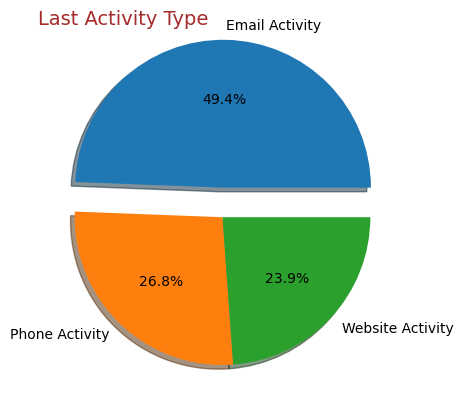

In [22]:
values = [2278,1234,1100]
names ='Email Activity','Phone Activity','Website Activity'
plt.pie(values,labels=names,autopct = '%.1f%%',explode=[0.2,0.0,0.0],shadow=True)
plt.title("Last Activity Type",fontsize=14,loc='left',color="brown")
plt.show()

### Exploratory On Status = 1/Yes

In [23]:
yes_stat=edu.loc[edu['status'] == 1,:]
yes_stat.shape

(1377, 14)

In [24]:
yes_stat.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
6,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
8,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
10,52,Professional,Website,Medium,2,433,2.140,Email Activity,No,No,No,No,No,1


### Observation: The two modes of interaction were found to be via the Website and via Mobile App 
<ul>
<li> Webiste views conversion was 84.2% and Mobile App for only 15.8%   
<li> Website view not-converted 52.7% and Mobile App not converted 42.8%
<li> <b> First Contact Lead Status Percentage is 29.86 <b>
<ul>    

In [25]:
edu.first_interaction.unique()

array(['Website', 'Mobile App'], dtype=object)

In [26]:
yes_stat['first_interaction'].value_counts()

Website       1159
Mobile App     218
Name: first_interaction, dtype: int64

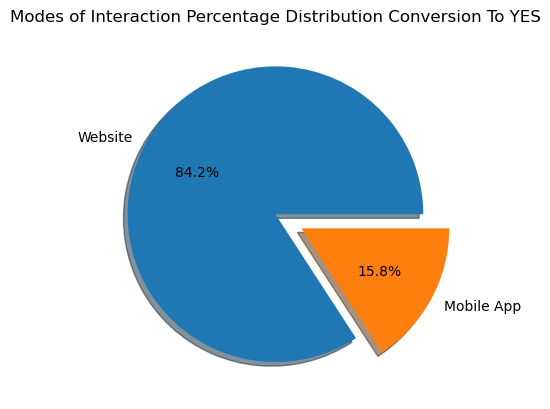

In [27]:
valuesss = [1159,218]
names ='Website','Mobile App'
plt.pie(valuesss,labels=names,autopct = '%.1f%%',explode=[0.0,0.2],shadow=True)
plt.title("Modes of Interaction Percentage Distribution Conversion To YES")
plt.show()

## Observation - 84% of the individauls that converted to customer first contact was Website

In [28]:
### Exploratory On Status = 0/No

In [29]:
no_stat=edu.loc[edu['status'] == 0,:]
no_stat.shape

(3235, 14)

In [30]:
no_stat['first_interaction'].value_counts()

Mobile App    1852
Website       1383
Name: first_interaction, dtype: int64

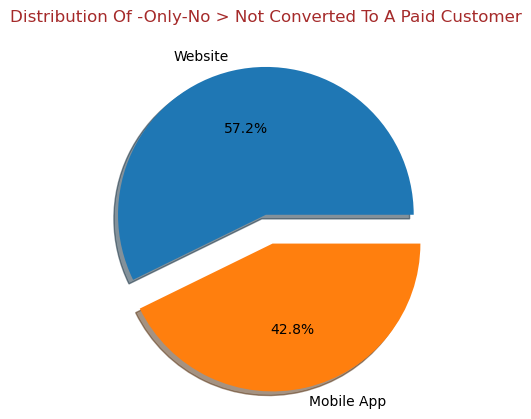

In [31]:
valuess = [1852,1383]
names ='Website','Mobile App'
plt.pie(valuess,labels=names,autopct = '%.1f%%',explode=[0.0,0.2],shadow=True)
plt.title("Distribution Of -Only-No > Not Converted To A Paid Customer",color="brown")
plt.show()

In [32]:
Yes_Mobile   = 1159
Yes_Website  = 218
No_Mobile    = 1852
No_Website   = 1383
Yes_Total = Yes_Mobile + Yes_Website 
First_Contact_Lead_Percentage   = (((Yes_Total) / 4612) * 100)
print("First Contact Lead Status Convert Percentage is",round(First_Contact_Lead_Percentage,2) )

First Contact Lead Status Convert Percentage is 29.86


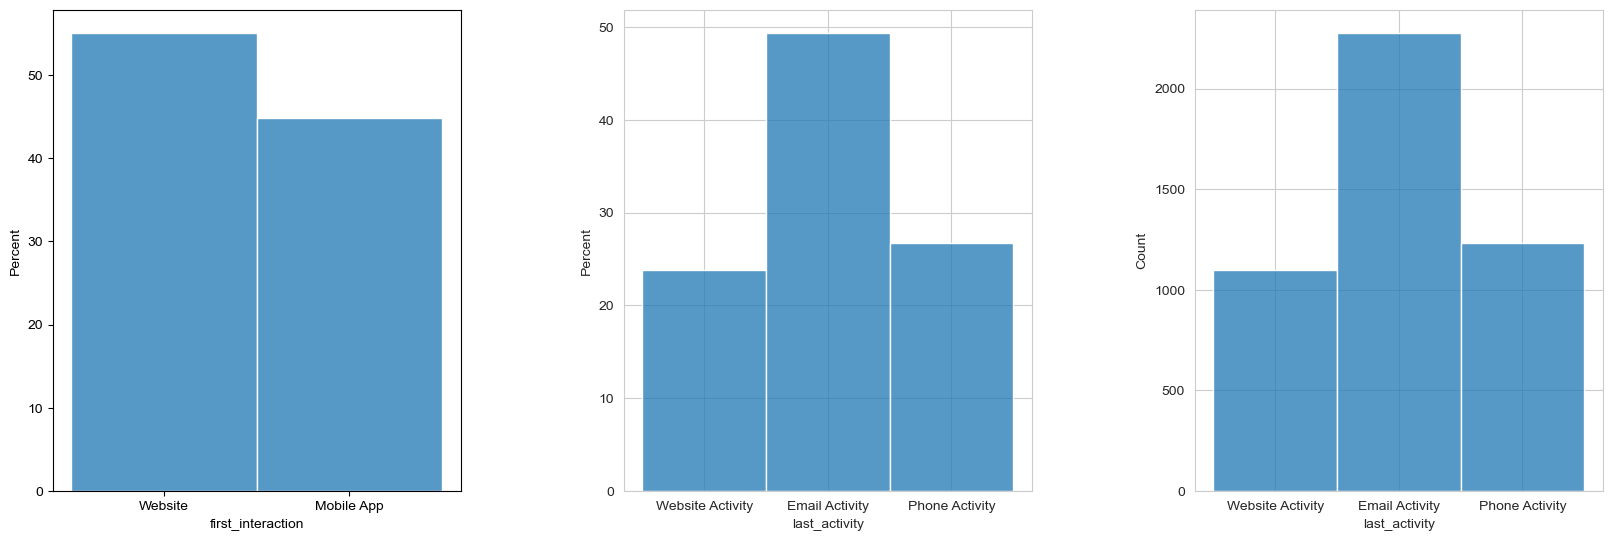

In [33]:
fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


ax1 = fig.add_subplot(2,3,1)
sns.set_style('whitegrid')
ax1=sns.histplot(data=edu,x="first_interaction",bins=20,stat="percent")

#### 1
ax2 = fig.add_subplot(2, 3, 2)
sns.set_style('whitegrid')
# ax2=sns.histplot(data=edu,x="last_activity",bins=20, hue_order = ['Email Activity','Phone Activity','Website Activity'],stat="percent")
ax2=sns.histplot(data=edu,x="last_activity",bins=20,stat="percent")
#### 2
ax3 = fig.add_subplot(2, 3, 3) 
sns.set_style('whitegrid')
# ax3 = sns.histplot(data=edu,x="last_activity",bins=20, hue_order = ['Email Activity','Phone Activity','Website Activity'],stat="count")
ax3 = sns.histplot(data=edu,x="last_activity",bins=20,stat="count")
### 3
#ax = fig.add_subplot(2,3,1)
#sns.set_style('whitegrid')
#ax=sns.histplot(data=edu,x="first_interaction",bins=20,stat="percent")


### How Current Occupation Affects Lead Status Is Illustrated In the Following Visualization
<ul>
<li> The Professional had the highest conversion percentage 
<li> The Highest Lead Conversion is Educational Channels with 197 Conversions  
</ul>    

Text(0, 0.5, 'Paid Customer - Blue=No & Orange=Yes:Status %')

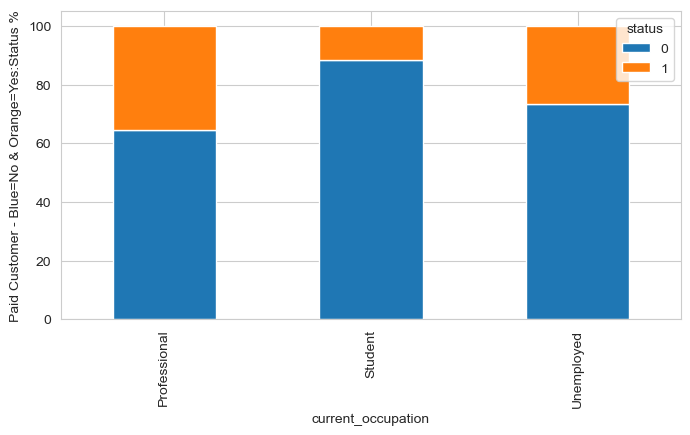

In [34]:
(pd.crosstab(edu['current_occupation'],edu['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Paid Customer - Blue=No & Orange=Yes:Status %')

In [35]:
### The Highest Lead Conversion is Educational Channels with 197 Conversions

In [36]:
edch = edu[(edu["educational_channels"] == "Yes") & (edu["status"] == 1)]
edch.shape

(197, 14)

### Graphical Representation Of Conversion vs Non Conversion for Each Out Reach Channel

Text(0.5, 1.0, 'Introduced by Way Of Educational Channels')

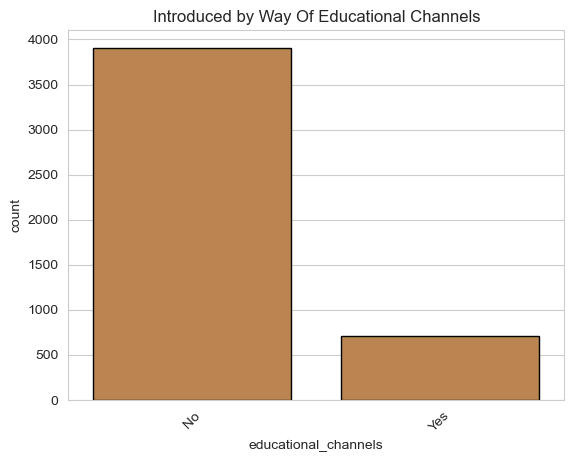

In [37]:
g=sns.countplot(x="educational_channels",data=edu,order=edu['educational_channels'].value_counts().index,color='peru',edgecolor='black')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Introduced by Way Of Educational Channels")

In [38]:
reff = edu[(edu["referral"] == "Yes") & (edu["status"] == 1)]
reff.shape

(63, 14)

Text(0.5, 1.0, 'Referred')

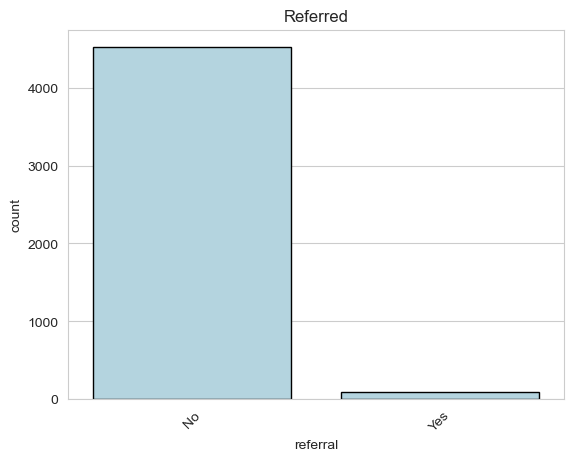

In [39]:
g=sns.countplot(x="referral",data=edu,order=edu['referral'].value_counts().index,color='lightblue',edgecolor='black')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Referred")

In [40]:
dgm = edu[(edu["digital_media"] == "Yes") & (edu["status"] == 1)]
dgm.shape

(168, 14)

Text(0.5, 1.0, 'Digital Media')

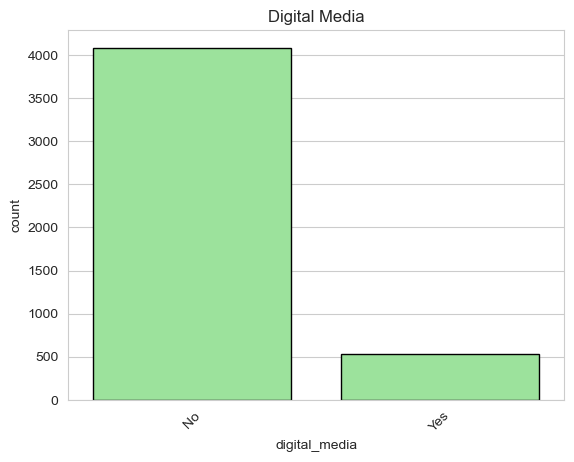

In [41]:
g=sns.countplot(x="digital_media",data=edu,order=edu['digital_media'].value_counts().index,color='lightgreen',edgecolor='black')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Digital Media")

In [42]:
pmt1 = edu[(edu["print_media_type1"] == "Yes") & (edu["status"] == 1)]
pmt1.shape

(159, 14)

Text(0.5, 1.0, 'Viewed in Newspaper')

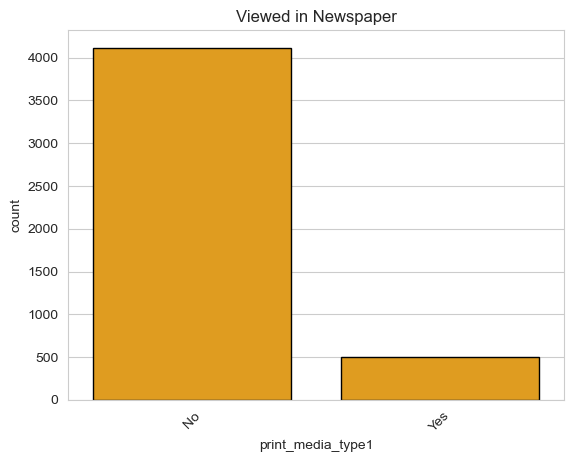

In [43]:
g=sns.countplot(x="print_media_type1",data=edu,order=edu['print_media_type1'].value_counts().index,color='orange',edgecolor='black')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Viewed in Newspaper")

In [44]:
pmt2 = edu[(edu["print_media_type2"] == "Yes") & (edu["status"] == 1)]
pmt2.shape

(75, 14)

Text(0.5, 1.0, 'Viewed in Magazine')

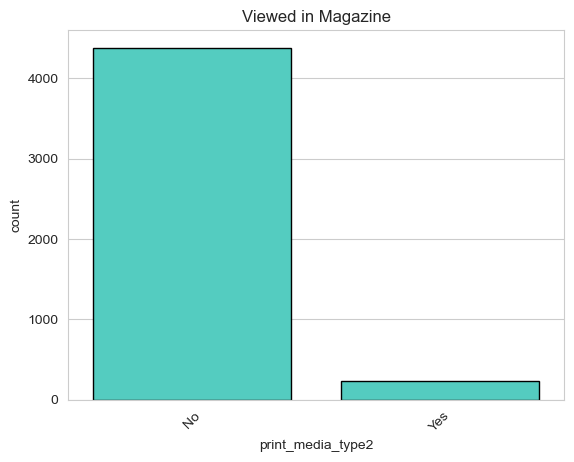

In [45]:
g=sns.countplot(x="print_media_type2",data=edu,order=edu['print_media_type2'].value_counts().index,color='turquoise',edgecolor='black')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title("Viewed in Magazine")

In [46]:
# sns.histplot(data=edu,x="first_interaction",bins=20)

In [47]:
counts1 = edu['print_media_type1'].value_counts()

In [48]:
print(counts1)

No     4115
Yes     497
Name: print_media_type1, dtype: int64


## Age distribution of Sample Population and  Converted Population

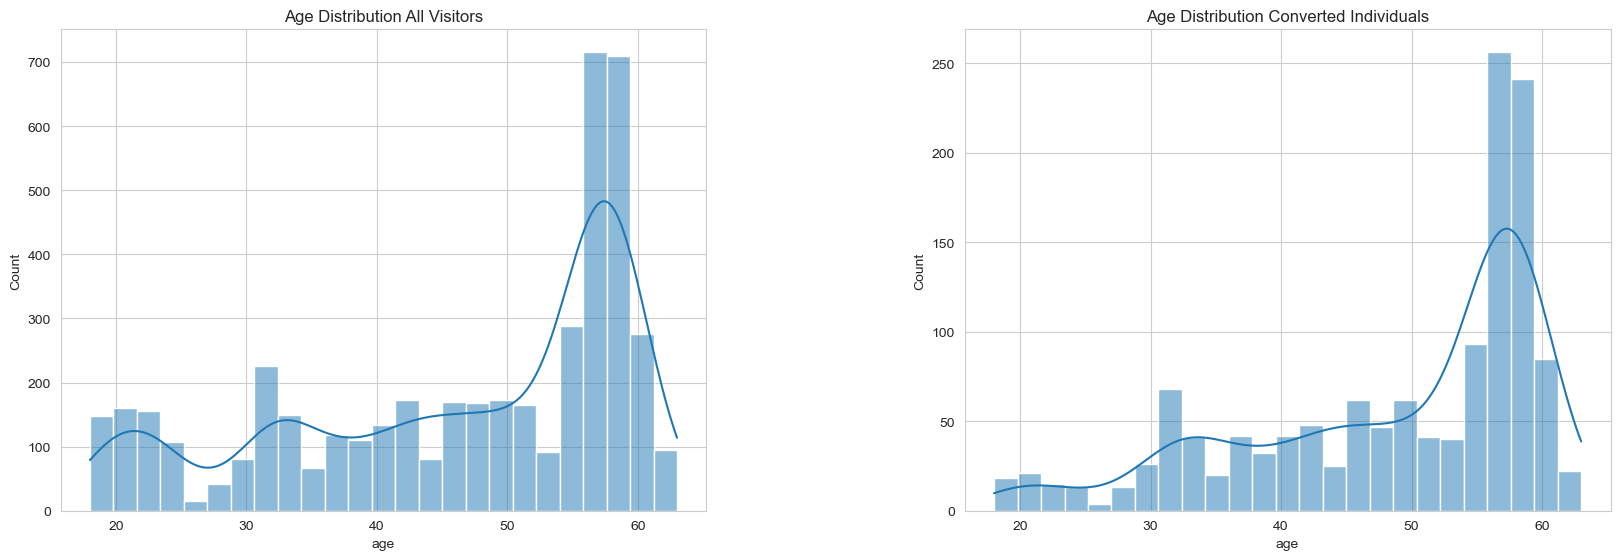

In [49]:
fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)




#### 1
ax = fig.add_subplot(2, 2, 1)
#sns.set_style('darkgrid')
ax=sns.histplot(data=edu,x="age",bins=25,kde=True).set(title="Age Distribution All Visitors")
#### 2
ax = fig.add_subplot(2, 2, 2) 
sns.set_style('darkgrid')
ax=sns.histplot(data=yes_stat,x="age",bins=25,kde=True).set(title="Age Distribution Converted Individuals")


In [50]:
edu.current_occupation.value_counts()

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64

In [51]:
edu.profile_completed.value_counts()

High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64

<AxesSubplot:xlabel='website_visits', ylabel='current_occupation'>

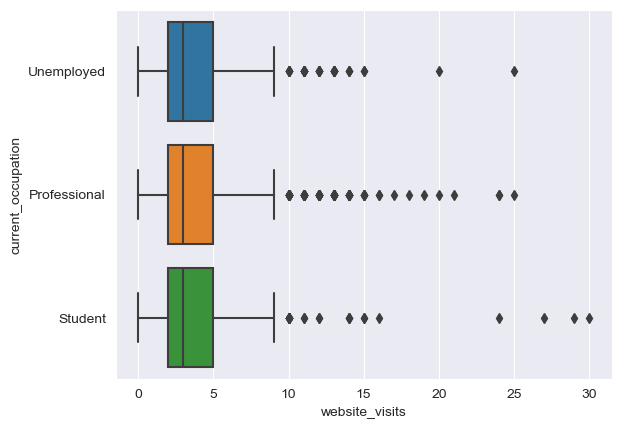

In [52]:
sns.boxplot(y="current_occupation",x="website_visits",data=edu)

<AxesSubplot:xlabel='age'>

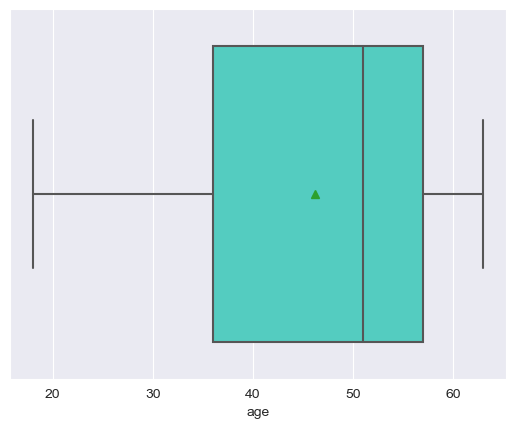

In [53]:
edu.age.describe()

sns.boxplot(data=edu,x="age",showmeans=True,color="Turquoise")

<AxesSubplot:xlabel='age', ylabel='current_occupation'>

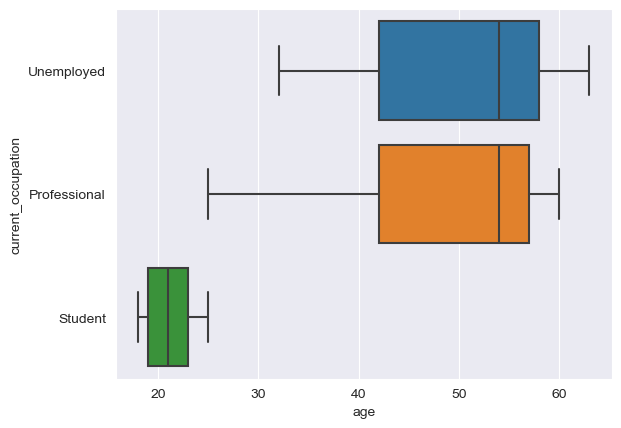

In [54]:
sns.boxplot(y="current_occupation",x="age",data=edu)

## Observing The Time Spent By Converted Customers
<ul>
<li> <b>time_spent_on_website<b> is a good indicator of conversion 
<li> <b>website_visits<b> and <b>page_views_per_visits<b> have a similar conversion rate but less than <b>time_spent_on_website<b>   
<li> The age range of <b>professionals<b> is wider than that of the <b>students<b> and <b>unemployed<b> considering the online course
</ul>    

In [55]:

#yyes_stat=edu.loc[edu['time'] == 1]
#type(yyes_stat)
np.percentile(yes_stat['time_spent_on_website'],50)
np.percentile(yes_stat['time_spent_on_website'],25)
np.percentile(yes_stat['time_spent_on_website'],75)

1829.0

In [56]:
# sns.boxplot(data=edu,x="status",y="time_spent_on_website")

In [57]:
#sns.set_style('whitegrid')
#= sns.boxplot(x='status',y='time_spent_on_website',data=edu)
#ax = sns.stripplot(x="status", y="time_spent_on_website",data=edu)

In [58]:
# sns.set_style('whitegrid')
# ax= sns.boxplot(x='status',y='page_views_per_visit',data=edu)
# ax = sns.stripplot(x="status", y="page_views_per_visit",data=edu)

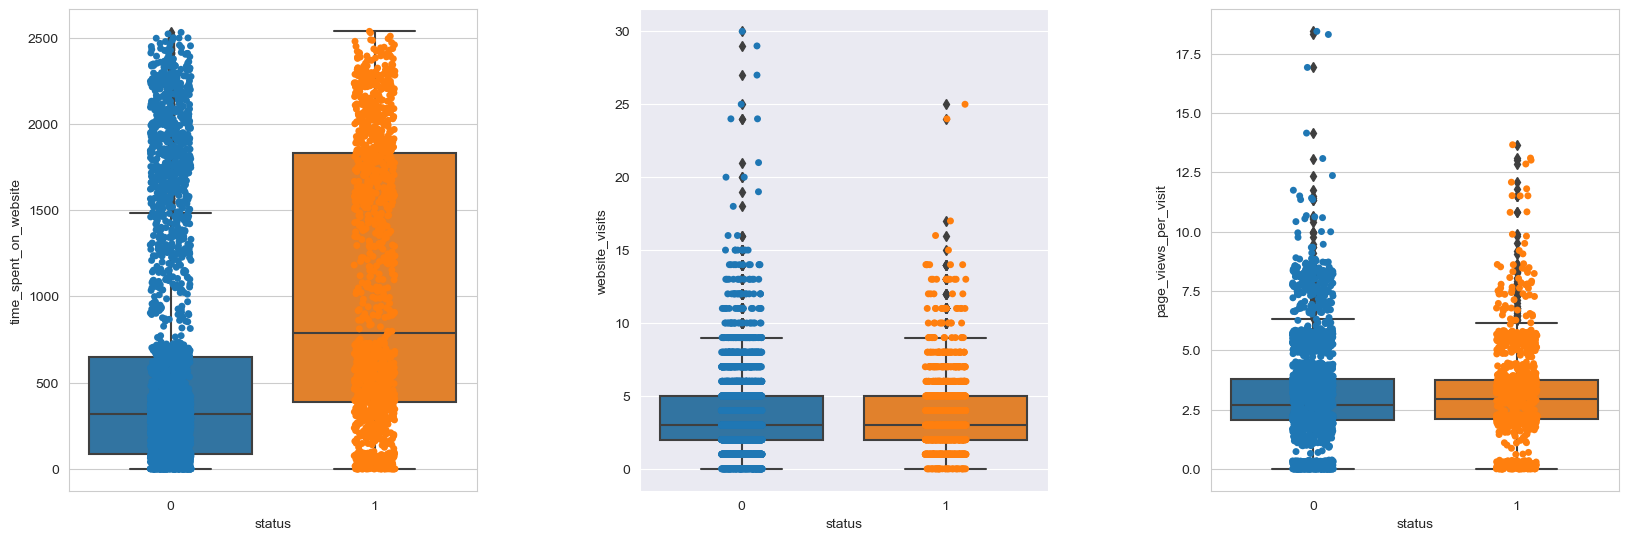

In [59]:
fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)




#### 1
ax = fig.add_subplot(2, 3, 2)
sns.set_style('whitegrid')
ax=sns.boxplot(data=edu,x="status",y="website_visits")
ax=sns.stripplot(x="status",y="website_visits",data=edu)
#### 2
ax = fig.add_subplot(2, 3, 1) 
sns.set_style('whitegrid')
ax = sns.boxplot(x='status',y='time_spent_on_website',data=edu)
ax = sns.stripplot(x="status", y="time_spent_on_website",data=edu)
###### 3
ax = fig.add_subplot(2, 3, 3) 
sns.set_style('whitegrid')
ax = sns.boxplot(x='status',y='page_views_per_visit',data=edu)
ax = sns.stripplot(x="status", y="page_views_per_visit",data=edu)


#  Preprocessing & Machine Learning
<ul>
<li> The ID column was dropped
<li> The categorical data types values were converted using get_dummies   
<li> No missing values were found to be in the dataset
<li> Feature analysis revealed candidate features that may be dropped     
<li> A GridSearchCV analysis was performed
<li> Although PRUNING was not implemented for this model, feature analysis indicates pruning can be done for model improvement     
</ul>     

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
edu.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [62]:
eduml = eddf1.copy()
X = eduml.drop(["status","ID"],axis=1)
y = eduml["status"]

In [63]:
X.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No


In [64]:
type(y)

pandas.core.series.Series

In [65]:
len(y)

4612

In [66]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [67]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64
------------------------------
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64


In [68]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


In [69]:
# To build classification models 
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
# from sklearn.linear_model import LogisticRegression

# For tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression



In [70]:
def metrics_score(actual, predicted):
   # print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Status', 'Status'], yticklabels=['Not Status', 'Status'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [71]:
# Building decision tree model
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [72]:
estimator = DecisionTreeClassifier(max_leaf_nodes=3,random_state=0)
estimator.fit(X_train,y_train)
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

In [73]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)] # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1
# If we have a test node
if (children_left[node_id] != children_right[node_id]):
    stack.append((children_left[node_id], parent_depth + 1))
    stack.append((children_right[node_id], parent_depth + 1))
else:
    is_leaves[node_id] = True
    print("The binary tree structure has %s nodes and has "
     "the following tree structure:"
% n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
        "node %s."
         % (node_depth[i] * "\t",
          i,
          children_left[i],
          feature[i],
          threshold[i],
          children_right[i],
))
print()
# First let's retrieve the decisio

node=0 test node: go to node 1 if X[:, 6] <= 0.5 else to node 2.
node=1 test node: go to node -1 if X[:, -2] <= -2.0 else to node -1.
node=2 test node: go to node 3 if X[:, 2] <= 414.0 else to node 4.
node=3 test node: go to node -1 if X[:, -2] <= -2.0 else to node -1.
node=4 test node: go to node -1 if X[:, -2] <= -2.0 else to node -1.



In [74]:
node_indicator = estimator.decision_path(X_test)
# Similarly, we can also have the leaves ids reached by each sample.
leave_id = estimator.apply(X_test)
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.
sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
node_indicator.indptr[sample_id + 1]]
print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
     if leave_id[sample_id] == node_id:
        continue
        if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
             threshold_sign = "<="
        else:
             threshold_sign = ">"
        print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
             % (node_id,
                 sample_id,
                 feature[node_id],
                 X_test[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
len(sample_ids))
common_node_id = np.arange(n_nodes)[common_nodes]
print("\nThe following samples %s share the node %s in the tree"
% (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))
       

Rules used to predict sample 0: 

The following samples [0, 1] share the node [0 2 4] in the tree
It is 60.0 % of all nodes.


In [75]:
print(threshold)

[  0.5  -2.  414.   -2.   -2. ]


In [76]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train)
print("Classification Report- Decision Tree Training")
print(classification_report(y_train,pred_train_dt))
     

Classification Report- Decision Tree Training
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2264
           1       0.80      0.87      0.83       964

    accuracy                           0.90      3228
   macro avg       0.87      0.89      0.88      3228
weighted avg       0.90      0.90      0.90      3228



### Generation Of Confusion Matrix - Training Of Decision Tree

Confusion Matrix - Decision Tree Training 


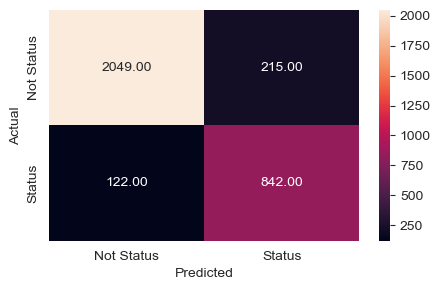

In [77]:
print("Confusion Matrix - Decision Tree Training ")
metrics_score(y_train, pred_train_dt)


### Observation:  Precison Results and On Tree Results 
<ul>
<li> From the precision results 1 - .80 = .20 or 20% chance that the model will predict that a lead will convert    
<li> The train Model did not overfit  
<li> The test Model did not overfit
<li> The tree reveals the following branch node#124 to node#125 to node#126 (Current_Occupation_Unemployed)
<li> Current_Occupation_Unemployed  is likely to convert based on Decision tree    
</ul>

In [78]:
# Checking performance on the training dataset

pred_test_dt = model_dt.predict(X_test)
print("Classification Report- Decision Tree Training")
print(classification_report(y_test,pred_test_dt))


Classification Report- Decision Tree Training
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       971
           1       0.72      0.79      0.75       413

    accuracy                           0.85      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.85      0.85      1384



## Generation of Confusion Matrix - Testing of Decision Tree

Generation of Confusion Matrix - Test Data for Decision Tree


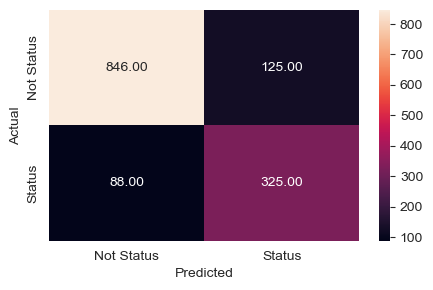

In [79]:
print("Generation of Confusion Matrix - Test Data for Decision Tree")
metrics_score(y_test,pred_test_dt)

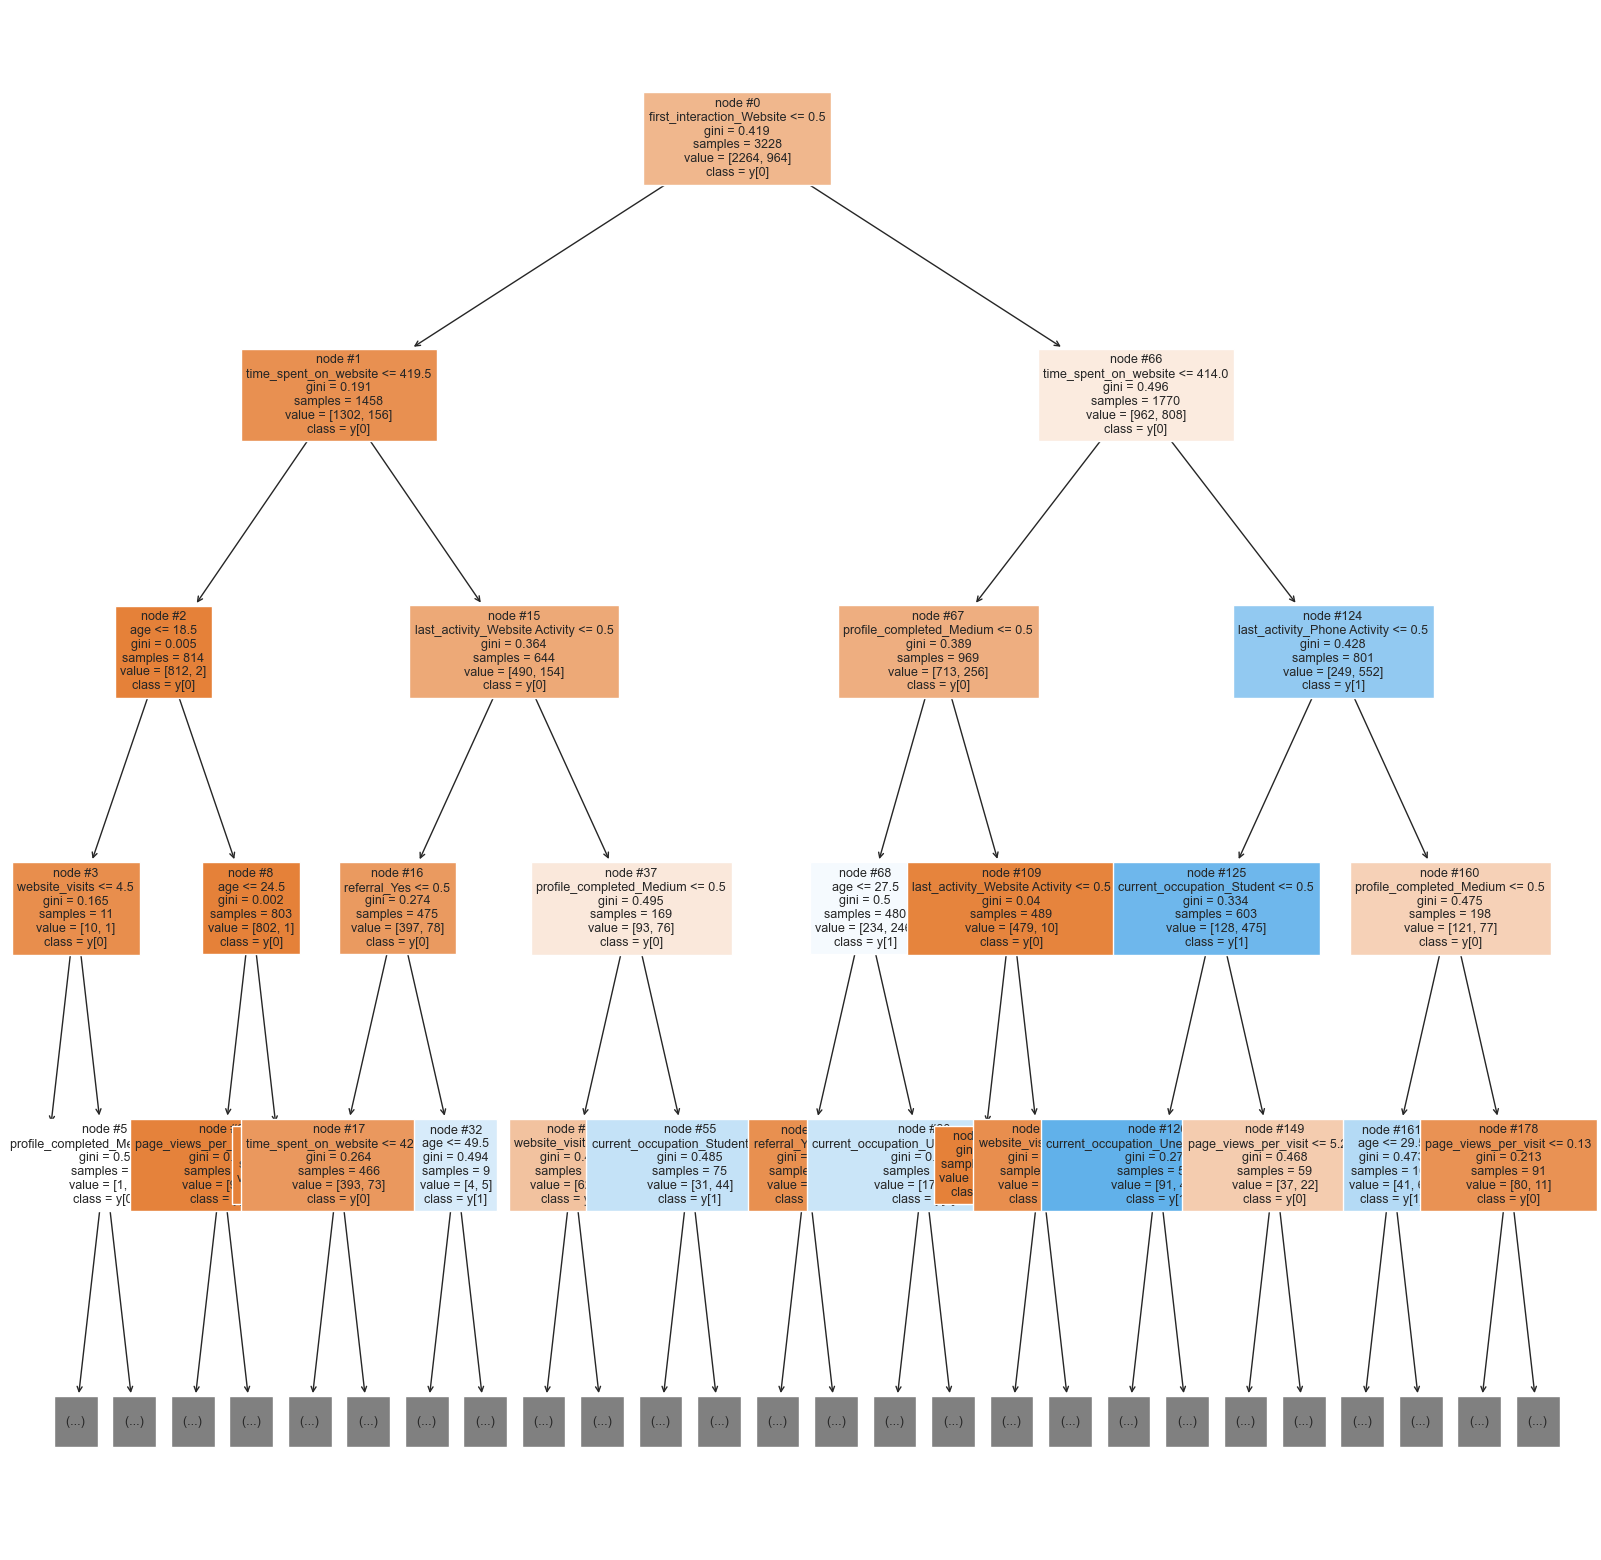

In [85]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
## tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=eduml.target_name)
plt.show()

###  TREE Observation - 
<ul>
<li> Blue leaves represent the <b>status=1<b>, that is <b>y[1]<b> while the orange is status=0.Darker color leafs signify more <li> Depth = 4
<li> time spent on website is a major feature
</ul>    

In [ ]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## GridSearchCV for Decision Tree

In [ ]:
params1 = {'min_samples_leaf':[1,2,3],'max_depth':[1,2,3]}

In [ ]:
grid1 = GridSearchCV(estimator=model_dt,param_grid=params1,cv=5,n_jobs=1,verbose=2)

In [ ]:
grid1.fit(X_train,y_train)

In [ ]:
print("Best_Score_Result from GridSearchCV")
print(grid1.best_score_)

In [ ]:
print("Best Param Results from GridSearchCV")
print(grid1.best_params_)

# Random Forest 
#### Observation
<ul>
<li> overfit model for the training model
<li> there was no overfit for the test model
</ul>    

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
print(classification_report(y_train, y_pred_train_rf))
metrics_score(y_train, y_pred_train_rf)

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)
print(classification_report(y_test, y_pred_test_rf))
metrics_score(y_test, y_pred_test_rf)

In [ ]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (6, 6))

sns.barplot(importance_df.Importance, importance_df.index)

### GridSearchCV for  Random Forest

In [ ]:
params2 = {'min_samples_leaf':[1,2,3],'max_depth':[1,2,3]}

In [ ]:
grid2 = GridSearchCV(estimator=rf_estimator,param_grid=params1,cv=5,n_jobs=1,verbose=2)

In [ ]:
grid2.fit(X_train,y_train)

In [ ]:
grid2.best_score_

In [ ]:
grid2.best_params_

### Important Features - Include features that contribute %5 of more to the Decision Tree model
<ul>
<li> <b> time_spent_on_website </b><br>
<li> <b> first_interaction_website </b><br>
<li> <b> profile_completed_Medium </b><br>
<li> <b> age </b><br>
<li> <b> current_occupation_Unemployed </b><br>
<li> <b> last_activity </b>
</ul>    

### Important Features - Include features that contribute %5 of more to the Random Forest Tree model
<ul>
<li> <b> time_spent_on_webiste</b><br>
<li> <b> first_interaction_website </b><br>
<li> <b> page_views_per_visit </b><br>
<li> <b> age </b><br>
<li> <b> profile_completed_Medium</b><br>
<li> <b> website_visits</b><br>
</ul>    

### Next Steps for Future Run For Improvement
<ul>
<li> Scaling The Data via StandardScaler
<li> Controlling Outliers via RobustScaler
<li> Running with Less Features based on the feature analysis
<li> Implement the GridSearchCV results    
</ul>

### Recommendations
<ul>
<li> Try to ascertain why so little of the potential leads were not converted
<li> Students may not be worth pursing 
<li> Investigate the cause of the skew in age. Marketing strategy needs to be re-evaluted 
<li> Course offering strategy needs to be reviewed
<li> Utilize the email activity in a more strategic fashion   
</ul>

In [ ]:
text_representation = tree.export_text(model_dt)
print(text_representation)